In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import numpy as np
import pandas as pd
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt
import itertools
from scipy.special import perm
import seaborn as sns

# Tool Functions

In [3]:
from tools import rhcRunner, saRunner, gaRunner, mimicRunner, repeat_algorithm, compare, tune_max_attempts_plot, \
               problem_size_plot, iteration_plot, fitness_per_iteration_plot

# Four Peaks

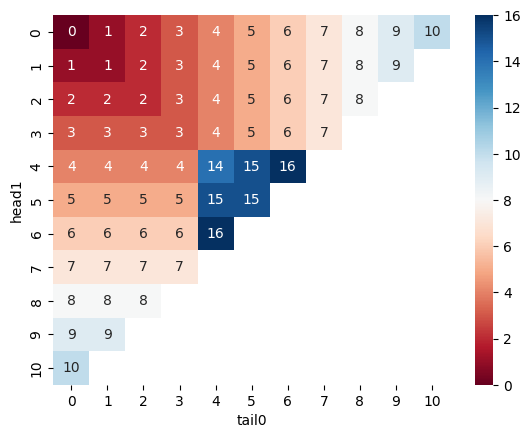

In [4]:
# maxima map
N = 10
t_pct = 0.35
T = t_pct * N
fitness = []
head1_ls = []
tail0_ls = []
for head1 in range(N+1):
    for tail0 in range(N-head1+1):
        head1_ls.append(head1)
        tail0_ls.append(tail0)
        fitness.append(max(head1, tail0) + N*(head1>T)*(tail0>T))
df = pd.DataFrame({
    'head1': head1_ls,
    'tail0': tail0_ls,
    'fitness': fitness
})
pivotted= df.drop_duplicates().pivot('head1','tail0','fitness')
sns.heatmap(pivotted,annot=True,cmap='RdBu')
plt.show()

## problem set

In [5]:
N_list = [10, 25, 50, 75, 100]
t_pct = 0.1
problem_set = []
for N in N_list:
    print(f'Expected best score is {N+N-(np.ceil(N*t_pct)+1)}.') # number of pairs
    # Initialize custom fitness function object
    fourPeaks_fitness_func = mlrose.FourPeaks(t_pct)
    problem_fourPeaks = mlrose.DiscreteOpt(length=N, fitness_fn=fourPeaks_fitness_func, maximize=True, max_val=2)    
    problem_set.append(problem_fourPeaks)

Expected best score is 18.0.
Expected best score is 46.0.
Expected best score is 94.0.
Expected best score is 141.0.
Expected best score is 189.0.


## complex problem

In [6]:
N_complex = 100 # number of elements
t_pct_complex = 0.1 # threshold
# element is either 0 or 1
print(f'Expected best score is {N_complex+N_complex-(np.ceil(N_complex*t_pct_complex)+1)}.') # number of pairs
# Initialize custom fitness function object
fourPeaks_fitness_func = mlrose.FourPeaks(t_pct_complex)
problem_fourPeaks_complex = mlrose.DiscreteOpt(length=N_complex, fitness_fn=fourPeaks_fitness_func, maximize=True, max_val=2)

Expected best score is 189.0.


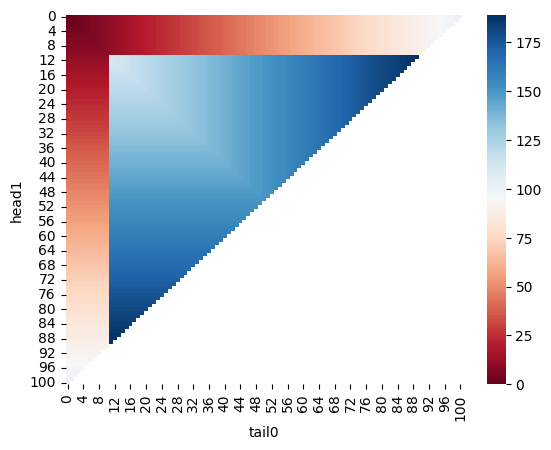

In [7]:
# maxima map
T = t_pct_complex * N_complex
fitness = []
head1_ls = []
tail0_ls = []
for head1 in range(N_complex+1):
    for tail0 in range(N_complex-head1+1):
        head1_ls.append(head1)
        tail0_ls.append(tail0)
        fitness.append(max(head1, tail0) + N_complex*(head1>T)*(tail0>T))
df = pd.DataFrame({
    'head1': head1_ls,
    'tail0': tail0_ls,
    'fitness': fitness
})
pivotted= df.drop_duplicates().pivot('head1','tail0','fitness')
sns.heatmap(pivotted,annot=False,cmap='RdBu')
plt.show()

### RHC

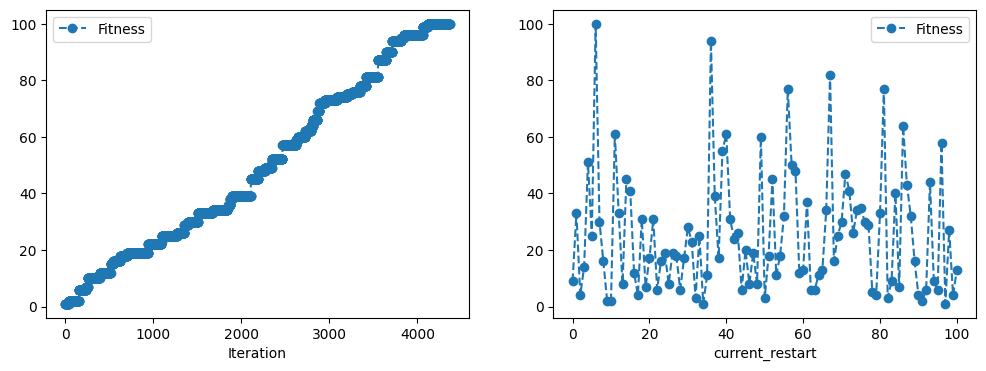

Best fitness is 100.
Best parameter is {'current_restart': 6, 'max_iters': 6000, 'Iteration': 4116}.
Iteration to converge or stop is 4116.
Time spent is 2.090402 seconds.
Time per iteration is 0.000207 seconds.
CPU times: user 23min 28s, sys: 7.25 s, total: 23min 35s
Wall time: 31min 2s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x15c537880>,
 'iteration_list': [6000],
 'max_attempts': 250,
 'restart_num': 100}

In [8]:
%%time
params = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': [6000],
    'max_attempts': 250, # 200
    'restart_num': 100
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = rhcRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_fourPeaks_rhc = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'restart_num': params['restart_num']
}
params_complex_fourPeaks_rhc

In [7]:
# params_complex_fourPeaks_rhc = {
#     'problem': problem_fourPeaks_complex,
#  'iteration_list': [6000],
#  'max_attempts': 250,
#  'restart_num': 100
# }

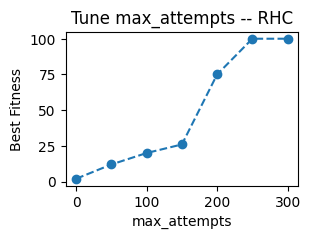

CPU times: user 1h 19min 46s, sys: 31.9 s, total: 1h 20min 18s
Wall time: 1h 38min 54s


In [9]:
%%time
fitness_list = tune_max_attempts_plot(rhcRunner, 
                                      'RHC',
                                      attempts_list=[0,50, 100, 150, 200, 250, 300], 
                                      best_params=params_complex_fourPeaks_rhc)

### SA

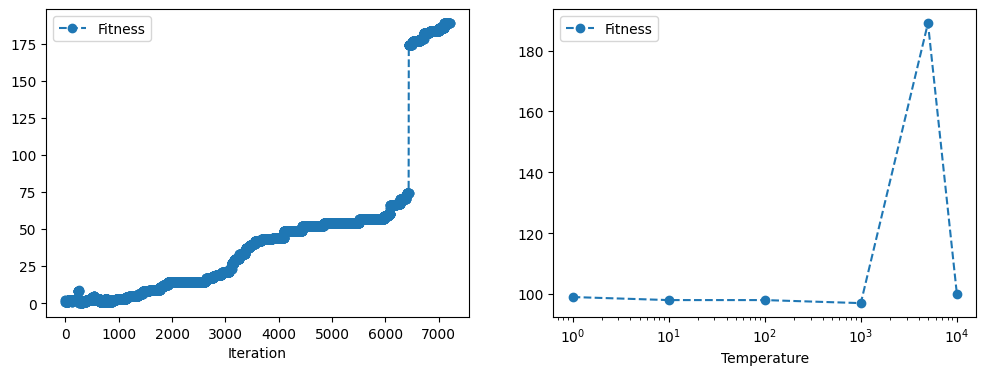

Best fitness is 189.
Best parameter is {'Temperature': 5000, 'max_iters': 10000, 'Iteration': 7103}.
Iteration to converge or stop is 7103.
Time spent is 3.073035 seconds.
Time per iteration is 0.000433 seconds.
CPU times: user 18.8 s, sys: 166 ms, total: 18.9 s
Wall time: 17.9 s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x15c537880>,
 'iteration_list': [10000],
 'max_attempts': 100,
 'temperature_list': [5000]}

In [10]:
%%time
params = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': [10000],
    'max_attempts': 100, #200
    'temperature_list': [1, 10, 100, 1000, 5000, 10000]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = saRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_fourPeaks_sa = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'temperature_list': [best_param['Temperature']]
}
params_complex_fourPeaks_sa

In [8]:
# params_complex_fourPeaks_sa = {
#     'problem': problem_fourPeaks_complex,
#  'iteration_list': [10000],
#  'max_attempts': 100,
#  'temperature_list': [5000]
# }

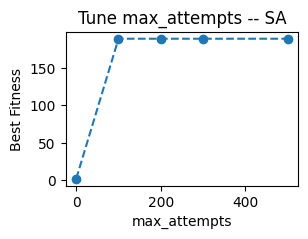

CPU times: user 18.6 s, sys: 152 ms, total: 18.7 s
Wall time: 18.6 s


In [11]:
%%time
fitness_list = tune_max_attempts_plot(saRunner, 
                                      'SA',
                                      attempts_list=[0,100,200,300,500], 
                                      best_params=params_complex_fourPeaks_sa)

### GA

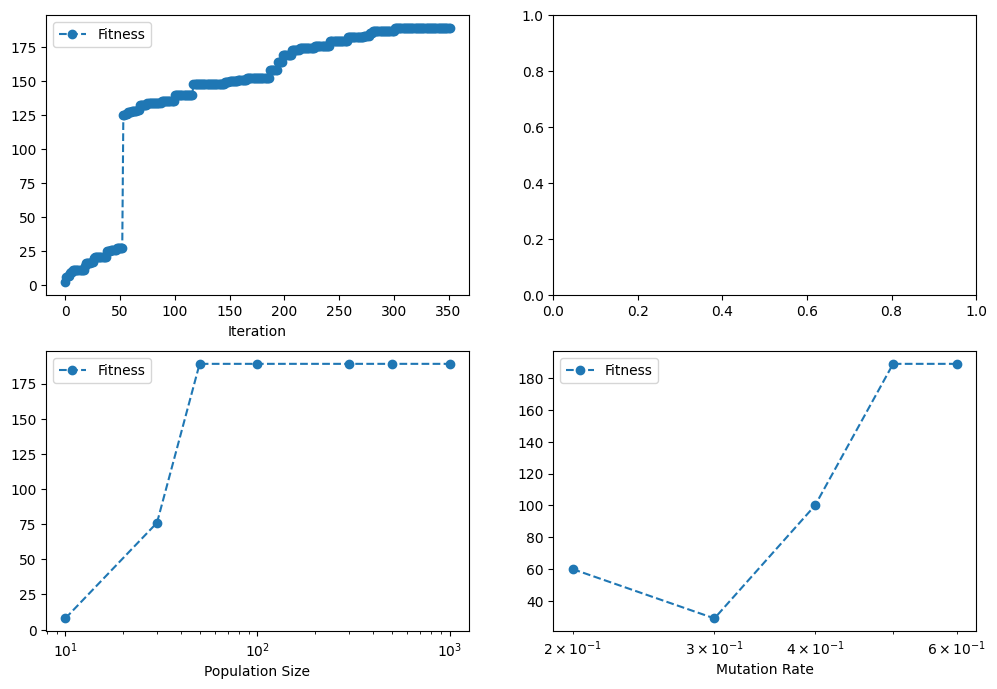

Best fitness is 189.
Best parameter is {'Population Size': 50, 'Mutation Rate': 0.5, 'max_iters': 2000, 'Iteration': 301}.
Iteration to converge or stop is 301.
Time spent is 0.038749 seconds.
Time per iteration is 0.000129 seconds.
CPU times: user 55.5 s, sys: 233 ms, total: 55.7 s
Wall time: 55.1 s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x15c537880>,
 'iteration_list': [2000],
 'max_attempts': 50,
 'population_sizes': [50],
 'mutation_rates': [0.5]}

In [12]:
%%time
params = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': [2000],
    'max_attempts': 50, #100
    'population_sizes': [10, 30, 50, 100,300,500,1000],
    'mutation_rates': [0.2, 0.3, 0.4, 0.5, 0.6]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = gaRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_fourPeaks_ga = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'population_sizes': [best_param['Population Size']],
    'mutation_rates': [best_param['Mutation Rate']]
}
params_complex_fourPeaks_ga

In [9]:
# params_complex_fourPeaks_ga = {
#     'problem': problem_fourPeaks_complex,
#  'iteration_list': [2000],
#  'max_attempts': 50,
#  'population_sizes': [50],
#  'mutation_rates': [0.5]
# }

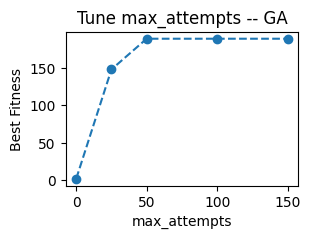

In [13]:
fitness_list = tune_max_attempts_plot(gaRunner, 
                                      'GA',
                                      attempts_list=[0,25,50,100,150], 
                                      best_params=params_complex_fourPeaks_ga)

### MIMIC

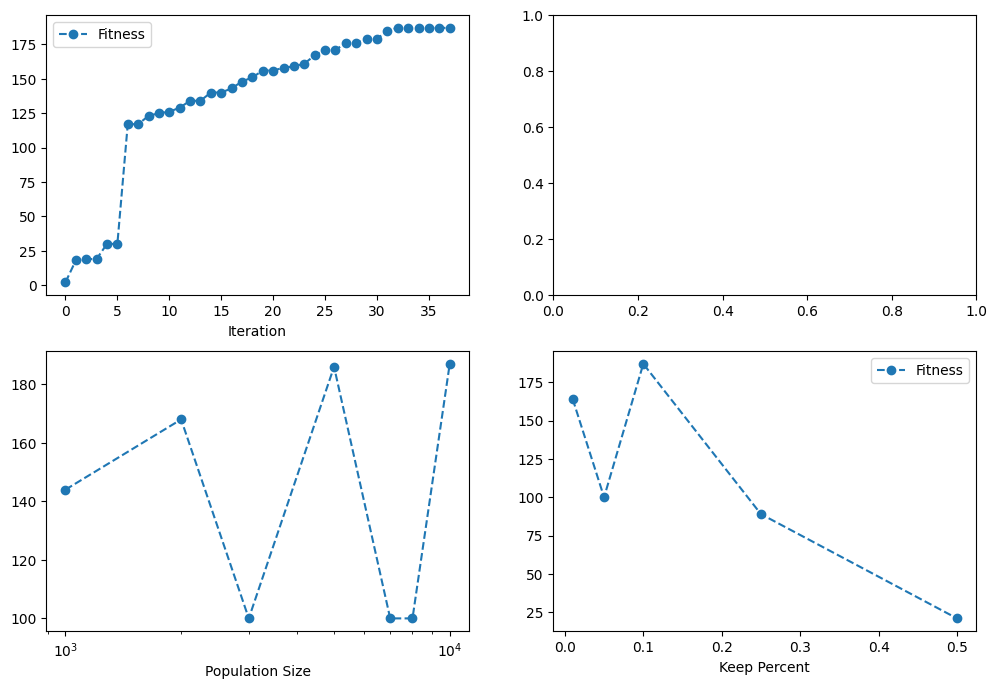

Best fitness is 187.
Best parameter is {'Population Size': 10000, 'Keep Percent': 0.1, 'max_iters': 50, 'Iteration': 32}.
Iteration to converge or stop is 32.
Time spent is 1.104296 seconds.
Time per iteration is 0.034509 seconds.
CPU times: user 5min 42s, sys: 34.6 s, total: 6min 16s
Wall time: 8min 1s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x15c537880>,
 'iteration_list': [50],
 'max_attempts': 5,
 'population_sizes': [10000],
 'keep_percent_list': [0.1]}

In [14]:
%%time
params = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': [50],
    'max_attempts': 5, #10
    'population_sizes': [1000, 2000,3000, 5000,7000,8000,10000],
    'keep_percent_list': [0.01, 0.05, 0.1, 0.25, 0.5]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = mimicRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_fourPeaks_mimic = {
    'problem': problem_fourPeaks_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'population_sizes': [best_param['Population Size']],
    'keep_percent_list': [best_param['Keep Percent']]
}
params_complex_fourPeaks_mimic

In [10]:
# params_complex_fourPeaks_mimic = {
#     'problem': problem_fourPeaks_complex,
#  'iteration_list': [50],
#  'max_attempts': 5,
#  'population_sizes': [10000],
#  'keep_percent_list': [0.1]
# }

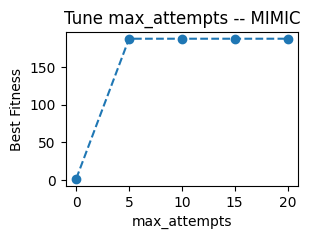

In [15]:
fitness_list = tune_max_attempts_plot(mimicRunner, 
                                      'MIMIC',
                                      attempts_list=[0,5,10,15,20], 
                                      best_params=params_complex_fourPeaks_mimic)

### compare

In [16]:
%%time
problem=problem_fourPeaks_complex
RHC_params=params_complex_fourPeaks_rhc
SA_params=params_complex_fourPeaks_sa
GA_params=params_complex_fourPeaks_ga 
MIMIC_params=params_complex_fourPeaks_mimic
RHC_params['problem'] = problem
SA_params['problem'] = problem
GA_params['problem'] = problem
MIMIC_params['problem'] = problem
rhc_result = repeat_algorithm(rhcRunner, RHC_params, repeat=3)
rhc_result.index = ['RHC']
sa_result = repeat_algorithm(saRunner, SA_params, repeat=3)
sa_result.index = ['SA']
ga_result = repeat_algorithm(gaRunner, GA_params, repeat=3)
ga_result.index = ['GA']
mimic_result = repeat_algorithm(mimicRunner, MIMIC_params, repeat=3)
mimic_result.index = ['MIMIC']
result = pd.concat([rhc_result, sa_result, ga_result, mimic_result])
result

CPU times: user 1h 58min 24s, sys: 37 s, total: 1h 59min 1s
Wall time: 2h 21min 27s


,best_fitness,mean_fitness,iter_num,converge_time_s,iter_time,func_evals
RHC,136,105,3231,13.190501,0.000223,51694
SA,189,117,5724,4.087912,0.000690,9101
GA,189,160,314,0.530508,0.001653,16101
MIMIC,187,151,31,16.883855,0.533750,326056


In [17]:
# compare(problem_fourPeaks_complex, 
#         RHC_params=params_complex_fourPeaks_rhc, 
#         SA_params=params_complex_fourPeaks_sa, 
#         GA_params=params_complex_fourPeaks_ga, 
#         MIMIC_params=params_complex_fourPeaks_mimic
#        )

#### problem size

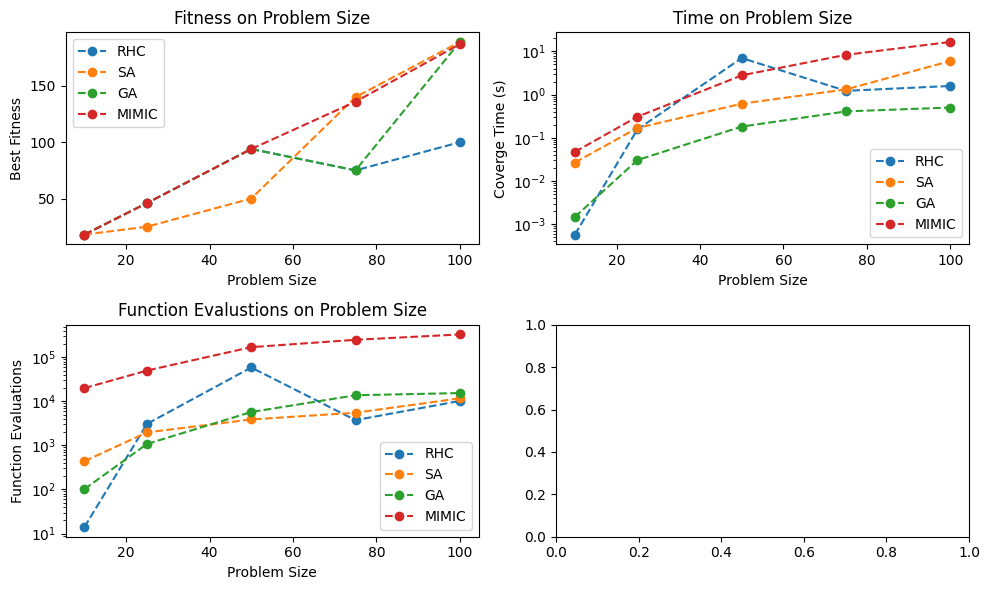

CPU times: user 1h 38min 2s, sys: 33.2 s, total: 1h 38min 36s
Wall time: 1h 51min 45s


,10,25,50,75,100
fitness_RHC,18.000000,46.000000,94.000000,75.000000,100.000000
converge_time_RHC,0.000576,0.156835,6.999514,1.220239,1.581619
func_evals_RHC,14.000000,3081.000000,58725.000000,3746.000000,10219.000000
fitness_SA,18.000000,25.000000,50.000000,140.000000,189.000000
converge_time_SA,0.026762,0.169361,0.614965,1.315973,5.946244
func_evals_SA,438.000000,1974.000000,3886.000000,5522.000000,11693.000000
fitness_GA,18.000000,46.000000,94.000000,75.000000,189.000000
converge_time_GA,0.001476,0.030530,0.181702,0.407991,0.501208
func_evals_GA,102.000000,1078.000000,5731.000000,13752.000000,15440.000000
fitness_MIMIC,18.000000,46.000000,94.000000,136.000000,187.000000


In [10]:
%%time
best_params_list = [
    params_complex_fourPeaks_rhc,
    params_complex_fourPeaks_sa,
    params_complex_fourPeaks_ga,
    params_complex_fourPeaks_mimic
]
N_result = problem_size_plot(N_list, problem_set, best_params_list, repeat=2)
N_result

#### iteration

plot RHC...
plot SA...
plot GA...
plot MIMIC...


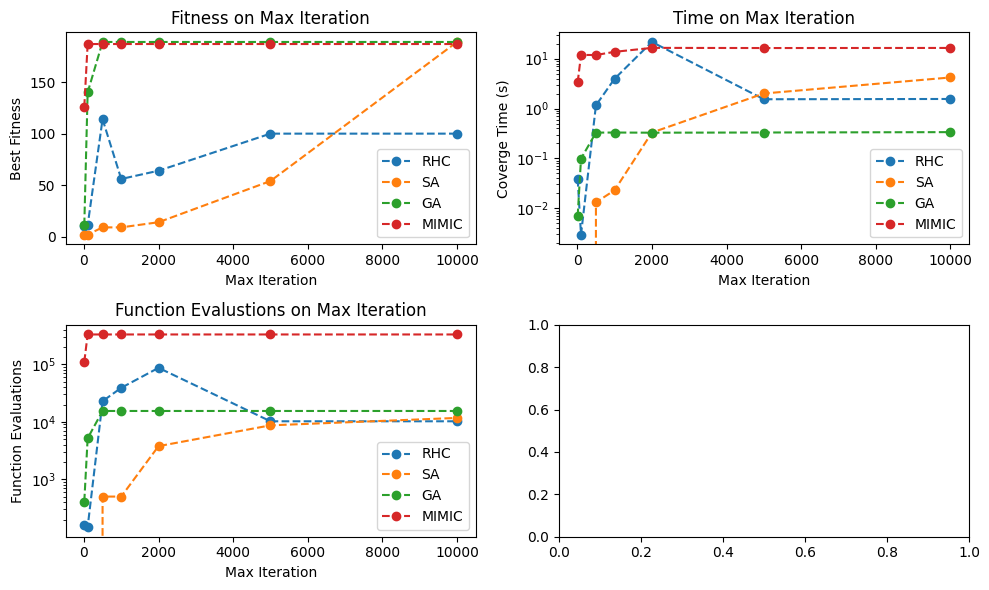

CPU times: user 1h 15min 10s, sys: 28 s, total: 1h 15min 38s
Wall time: 1h 23min 16s


,10,100,500,1000,2000,5000,10000
fitness_RHC,10.000000,11.000000,114.000000,56.000000,64.000000,100.000000,100.000000
converge_time_RHC,0.038818,0.002967,1.160173,3.960014,21.653688,1.536784,1.556876
func_evals_RHC,162.000000,148.000000,22845.000000,39002.000000,86766.000000,10219.000000,10219.000000
fitness_SA,2.000000,2.000000,9.000000,9.000000,14.000000,54.000000,189.000000
converge_time_SA,0.000000,0.000000,0.013134,0.023001,0.329885,2.005291,4.202290
func_evals_SA,0.000000,0.000000,502.000000,502.000000,3780.000000,8687.000000,11693.000000
fitness_GA,11.000000,140.000000,189.000000,189.000000,189.000000,189.000000,189.000000
converge_time_GA,0.006913,0.098877,0.329258,0.330558,0.328036,0.330912,0.336637
func_evals_GA,412.000000,5172.000000,15440.000000,15440.000000,15440.000000,15440.000000,15440.000000
fitness_MIMIC,126.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000


In [11]:
%%time
best_params_list = [
    params_complex_fourPeaks_rhc,
    params_complex_fourPeaks_sa,
    params_complex_fourPeaks_ga,
    params_complex_fourPeaks_mimic
]
iter_list = [10, 100, 500, 1000, 2000, 5000, 10000]
iter_result = iteration_plot(iter_list, best_params_list, repeat=1)
iter_result

plot RHC...
plot SA...
plot GA...
plot MIMIC...


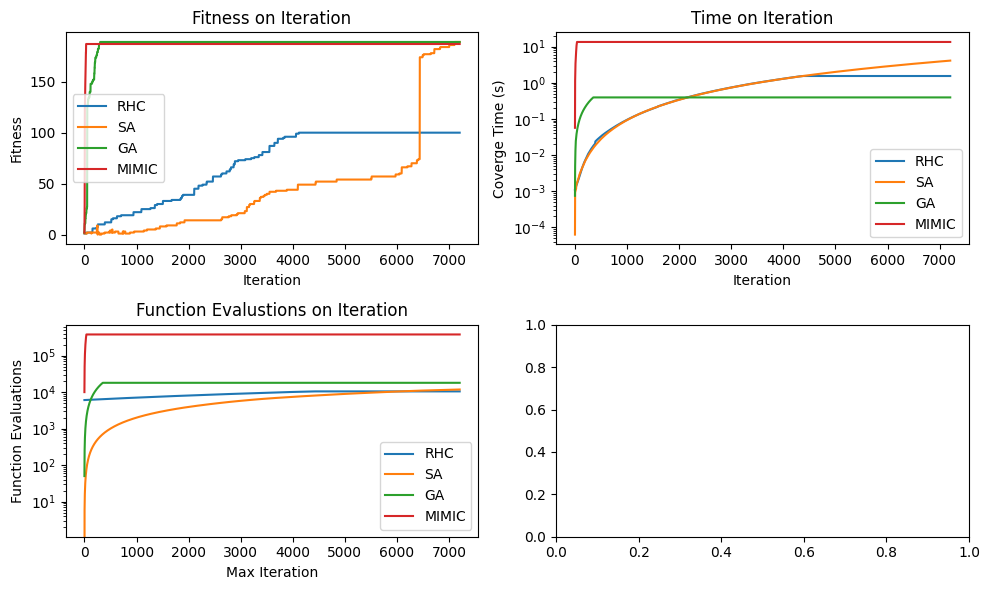

CPU times: user 31.8 s, sys: 1.1 s, total: 32.9 s
Wall time: 32.3 s


In [12]:
%%time
best_params_list = [
    params_complex_fourPeaks_rhc,
    params_complex_fourPeaks_sa,
    params_complex_fourPeaks_ga,
    params_complex_fourPeaks_mimic
]
fitness_per_iteration_plot(best_params_list)